In [1]:
%%capture
# install Tensorflow
!pip install tensorflow 

# Loading spacy's French and English languages 
!pip install -U spacy
!python -m spacy download fr_core_news_sm
!python -m spacy download en_core_web_sm

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import fr_core_news_sm
import en_core_web_sm
import tensorflow as tf
tf.__version__


c:\Users\Farae\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.11.1'

In [2]:
# Loading data
db = pd.read_csv("data.txt", delimiter="\t", header=None)
db.head()

,0,1
0,Go.,Va !
1,Hi.,Salut !
2,Run!,Cours !
3,Run!,Courez !
4,Wow!,Ça alors !


In [3]:
db.shape

(160538, 2)

In [7]:
first_5000 = db.head(1000)
last_5000 = db.tail(1000)
doc = pd.concat([first_5000, last_5000])

In [8]:
doc.shape

(2000, 2)

In [9]:
# Loading of the entire corpus of French and English sentences
fr_corpus = " ".join(doc.iloc[:, 1].to_list())
en_corpus = " ".join(doc.iloc[:, 0].to_list())

In [10]:
# Loading both corpora into spacy 
nlp_fr = fr_core_news_sm.load()
nlp_fr.max_length = len(fr_corpus)

nlp_en = en_core_web_sm.load()
nlp_en.max_length = len(en_corpus)

fr_doc = nlp_fr(fr_corpus)
en_doc = nlp_en(en_corpus)

In [11]:
# Tokenization of each sentence via spacy 
doc["fr_tokens"] = doc.iloc[:, 1].apply(nlp_fr.tokenizer)
doc["en_tokens"] = doc.iloc[:, 0].apply(nlp_en.tokenizer)

In [12]:
en_tokens = [token.text for token in en_doc]
en_vocabulary_set= set(en_tokens)
en_vocab_size = len(en_vocabulary_set)
print(en_vocab_size)

3161


In [13]:
fr_tokens = [token.text for token in fr_doc]
fr_vocabulary_set= set(fr_tokens)
fr_vocab_size = len(fr_vocabulary_set)
print(fr_vocab_size)

4127


In [14]:
# Creation of an id for each token
all_en_tokens = {en_token: i + 1 for i, en_token in enumerate(en_vocabulary_set)}
all_fr_tokens = {fr_token: i + 1 for i, fr_token in enumerate(fr_vocabulary_set)}
# RQ: We take at i+1 to leave the value 0 for the creation of the padded_sequences

In [15]:
# Creation of functions that will create a vector of indices for each of the token sequences
def en_tokens_to_index(tokens):
    return [all_en_tokens[token.text] for token in tokens]

def fr_tokens_to_index(tokens):
    return [all_fr_tokens[token.text] for token in tokens]

In [16]:
# Transformation of tokens into indices
doc["fr_indices"] = doc["fr_tokens"].apply(fr_tokens_to_index)
doc["en_indices"] = doc["en_tokens"].apply(en_tokens_to_index)

In [151]:
doc.tail()

,0,1,fr_tokens,en_tokens,fr_indices,en_indices
160533,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,"(Une, empreinte, carbone, est, la, somme, de, ...","(A, carbon, footprint, is, the, amount, of, ca...","[4008, 3950, 1868, 2444, 4005, 4009, 1769, 267...","[2230, 423, 2564, 1922, 1937, 669, 1913, 423, ..."
160534,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,"(La, mort, est, une, chose, qu', on, nous, déc...","(Death, is, something, that, we, 're, often, d...","[2487, 3885, 2444, 528, 1137, 3047, 59, 1031, ...","[993, 1922, 1174, 2706, 477, 1611, 121, 1787, ..."
160535,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,"(Puisqu', il, y, a, de, multiples, sites, web,...","(Since, there, are, usually, multiple, website...","[976, 2394, 2614, 3484, 1769, 2306, 1736, 835,...","[1464, 1194, 1999, 2247, 2725, 2418, 36, 3154,..."
160536,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,"(Si, quelqu', un, qui, ne, connaît, pas, vos, ...","(If, someone, who, does, n't, know, your, back...","[1425, 1974, 1224, 3522, 632, 1984, 1943, 1521...","[2612, 162, 759, 2707, 924, 1994, 1805, 1189, ..."
160537,It may be impossible to get a completely error...,Il est peut-être impossible d'obtenir un Corpu...,"(Il, est, peut-être, impossible, d', obtenir, ...","(It, may, be, impossible, to, get, a, complete...","[4095, 2444, 3625, 3038, 4026, 3343, 1224, 293...","[2468, 2815, 899, 2362, 900, 2946, 2697, 2599,..."


In [18]:
# Creation of a set() that will take all the unique tokens from our text corpus
en_tokens = [token.text for token in en_doc]
en_vocabulary_set= set(en_tokens)
en_vocab_size = len(en_vocabulary_set)
print(en_vocab_size)

3161


In [19]:
# Same thing for French
fr_tokens = [token.text for token in fr_doc]
fr_vocabulary_set= set(fr_tokens)
fr_vocab_size = len(fr_vocabulary_set)
print(fr_vocab_size)

4127


In [20]:
# Creation of an id for each token
all_en_tokens = {en_token: i + 1 for i, en_token in enumerate(en_vocabulary_set)}
all_fr_tokens = {fr_token: i + 1 for i, fr_token in enumerate(fr_vocabulary_set)}
# RQ: We take at i+1 to leave the value 0 for the creation of the padded_sequences

In [21]:
# Creation of functions that will create a vector of indices for each of the token sequences
def en_tokens_to_index(tokens):
    return [all_en_tokens[token.text] for token in tokens]

def fr_tokens_to_index(tokens):
    return [all_fr_tokens[token.text] for token in tokens]

In [22]:
# Transformation of tokens into indices
doc["fr_indices"] = doc["fr_tokens"].apply(fr_tokens_to_index)
doc["en_indices"] = doc["en_tokens"].apply(en_tokens_to_index)

In [23]:
doc.tail()

,0,1,fr_tokens,en_tokens,fr_indices,en_indices
160533,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,"(Une, empreinte, carbone, est, la, somme, de, ...","(A, carbon, footprint, is, the, amount, of, ca...","[4008, 3950, 1868, 2444, 4005, 4009, 1769, 267...","[2230, 423, 2564, 1922, 1937, 669, 1913, 423, ..."
160534,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,"(La, mort, est, une, chose, qu', on, nous, déc...","(Death, is, something, that, we, 're, often, d...","[2487, 3885, 2444, 528, 1137, 3047, 59, 1031, ...","[993, 1922, 1174, 2706, 477, 1611, 121, 1787, ..."
160535,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,"(Puisqu', il, y, a, de, multiples, sites, web,...","(Since, there, are, usually, multiple, website...","[976, 2394, 2614, 3484, 1769, 2306, 1736, 835,...","[1464, 1194, 1999, 2247, 2725, 2418, 36, 3154,..."
160536,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,"(Si, quelqu', un, qui, ne, connaît, pas, vos, ...","(If, someone, who, does, n't, know, your, back...","[1425, 1974, 1224, 3522, 632, 1984, 1943, 1521...","[2612, 162, 759, 2707, 924, 1994, 1805, 1189, ..."
160537,It may be impossible to get a completely error...,Il est peut-être impossible d'obtenir un Corpu...,"(Il, est, peut-être, impossible, d', obtenir, ...","(It, may, be, impossible, to, get, a, complete...","[4095, 2444, 3625, 3038, 4026, 3343, 1224, 293...","[2468, 2815, 899, 2362, 900, 2946, 2697, 2599,..."


In [24]:
# Use of Keras to create token sequences of the same length
padded_fr_indices = tf.keras.preprocessing.sequence.pad_sequences(doc["fr_indices"], padding="post")
padded_en_indices = tf.keras.preprocessing.sequence.pad_sequences(doc["en_indices"], padding="post")

In [25]:
# Visualization of the shape of one of the tensors
padded_fr_indices.shape

(2000, 63)

In [26]:
padded_en_indices.shape

(2000, 53)

In [27]:
doc["fr_indices"].apply(len).max()

63

In [28]:
doc["en_indices"].apply(len).max()

53

In [29]:
# Application of the categorization of the target variable 
binarized_en_indices = tf.keras.utils.to_categorical(padded_en_indices, num_classes=en_vocab_size+1)
binarized_en_indices.shape

(2000, 53, 3162)

In [30]:
# Creation of tf.data.Dataset for each of the French and English tensors
fr_ds = tf.data.Dataset.from_tensor_slices(padded_fr_indices)
en_ds = tf.data.Dataset.from_tensor_slices(binarized_en_indices)

In [31]:
# Create a complete tensorflow dataset
tf_ds = tf.data.Dataset.zip((fr_ds, en_ds))

In [32]:
next(iter(tf_ds))

(<tf.Tensor: shape=(63,), dtype=int32, numpy=
 array([3323, 1898,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])>,
 <tf.Tensor: shape=(53, 3162), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

In [33]:
# Shuffle & Batch
BATCH_SIZE = 32

tf_ds = tf_ds.shuffle(len(doc)).batch(BATCH_SIZE)

In [34]:
TAKE_SIZE = int(0.7 * len(doc) / BATCH_SIZE)

train_data = tf_ds.take(TAKE_SIZE)
test_data = tf_ds.skip(TAKE_SIZE)

In [35]:
# Create the model
model = tf.keras.Sequential([
                  # Input Word Embedding layer        
                  tf.keras.layers.Embedding(fr_vocab_size + 1, 64, mask_zero=True),

                  # LSTM Bidirectional layer
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  
                  # LSTM Bidirectionnal new layer
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),

                  # Repeat Vector
                  tf.keras.layers.RepeatVector(binarized_en_indices.shape[1]),

                  # LSTM new layer
                  tf.keras.layers.LSTM(32, return_sequences=True),               

                  # Output layer with number of output neurons equal to class number with softmax function
                  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(en_vocab_size+1, activation="softmax"))
           
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          264192    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 repeat_vector (RepeatVector  (None, 53, 128)          0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 53, 32)            20608     
                                                        

In [37]:
# "Random" prediction to test our model 
input_text, output_text = next(iter(train_data))
print(input_text.numpy().shape)
print(model.predict(input_text).shape)
print(output_text.numpy().shape)

(32, 63)
1/1 [==============================] - 3s 3s/step
(32, 53, 3162)
(32, 53, 3162)


In [96]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model
initial_learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1090,
    decay_rate=0.96,
    staircase=True)

# Using a simple compiler with an Adam optimizer to compute our gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [134]:
history_lstm = model.fit(train_data,
                    validation_data=test_data,
                    epochs=10)

Epoch 1/10
43/43 [==============================] - 44s 993ms/step - loss: 0.5866 - categorical_accuracy: 0.8747 - val_loss: 0.5942 - val_categorical_accuracy: 0.8728
Epoch 2/10
43/43 [==============================] - 44s 1s/step - loss: 0.5749 - categorical_accuracy: 0.8762 - val_loss: 0.5864 - val_categorical_accuracy: 0.8739
Epoch 3/10
43/43 [==============================] - 46s 1s/step - loss: 0.5911 - categorical_accuracy: 0.8734 - val_loss: 0.5871 - val_categorical_accuracy: 0.8707
Epoch 4/10
43/43 [==============================] - 46s 1s/step - loss: 0.5753 - categorical_accuracy: 0.8759 - val_loss: 0.5707 - val_categorical_accuracy: 0.8761
Epoch 5/10
43/43 [==============================] - 46s 1s/step - loss: 0.5976 - categorical_accuracy: 0.8719 - val_loss: 0.5927 - val_categorical_accuracy: 0.8740
Epoch 6/10
43/43 [==============================] - 46s 1s/step - loss: 0.6084 - categorical_accuracy: 0.8694 - val_loss: 0.6199 - val_categorical_accuracy: 0.8631
Epoch 7/10
43

In [78]:
# Testing a translation
for input_text, translation in test_data.take(1):
    pred = np.argmax(model.predict(input_text), axis=-1)

1/1 [==============================] - 0s 134ms/step


In [106]:
pred_lstm = np.argmax(model.predict(input_text), axis=-1)

1/1 [==============================] - 3s 3s/step


In [107]:
# CAUTION: it's possible because there is only one key for each value
indice_to_fr_token = dict(zip(all_fr_tokens.values(), all_fr_tokens.keys()))
indice_to_en_token = dict(zip(all_fr_tokens.values(), all_en_tokens.keys()))

In [108]:
# French Sentence 
for indice in input_text[0]:
    if indice == 0:
        break
    print(indice_to_fr_token[indice.numpy()])

Je
n'
arrive
pas
à
croire
que
vous
ne
soyez
pas
disposés
à
au
moins
envisager
la
possibilité
qu'
il
y
ait
une
autre
explication
.


In [109]:
# Real English Sentence 
for indice in np.argmax(translation, axis=-1)[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

I
ca
n't
believe
that
you
are
n't
at
least
willing
to
consider
the
possibility
that
there
's
another
explanation
.


In [111]:
# Sentence translated into English by the model 
for indice in pred_lstm[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

I
ca
n't
believe
that
are
are
are
least
least
willing
least
consider
consider
possibility
possibility
there
another
another
explanation
.


In [63]:
import tensorflow as tf

# Create the model using GRU
model_gru = tf.keras.Sequential([
    # Input Word Embedding layer
    tf.keras.layers.Embedding(fr_vocab_size + 1, 64, mask_zero=True),

    # GRU Bidirectional layer
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    
    # GRU Bidirectional new layer
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),

    # Repeat Vector
    tf.keras.layers.RepeatVector(binarized_en_indices.shape[1]),

    # GRU new layer
    tf.keras.layers.GRU(32, return_sequences=True),

    # Output layer with number of output neurons equal to class number with softmax function
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(en_vocab_size + 1, activation="softmax"))
])


In [64]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          264192    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        49920     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 repeat_vector_1 (RepeatVect  (None, 53, 128)          0         
 or)                                                             
                                                                 
 gru_2 (GRU)                 (None, 53, 32)            15552     
                                                      

In [65]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model
initial_learning_rate = 0.01

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1090,
    decay_rate=0.96,
    staircase=True)

# Using a simple compiler with an Adam optimizer to compute our gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [135]:
history_gru = model_gru.fit(train_data,
                    validation_data=test_data,
                    epochs=10)

Epoch 1/10


43/43 [==============================] - 27s 612ms/step - loss: 0.9344 - categorical_accuracy: 0.8277 - val_loss: 0.8862 - val_categorical_accuracy: 0.8320
Epoch 2/10
43/43 [==============================] - 27s 619ms/step - loss: 0.8463 - categorical_accuracy: 0.8420 - val_loss: 0.8546 - val_categorical_accuracy: 0.8388
Epoch 3/10
43/43 [==============================] - 27s 621ms/step - loss: 0.8568 - categorical_accuracy: 0.8403 - val_loss: 0.9080 - val_categorical_accuracy: 0.8284
Epoch 4/10
43/43 [==============================] - 27s 628ms/step - loss: 0.8794 - categorical_accuracy: 0.8359 - val_loss: 0.8279 - val_categorical_accuracy: 0.8452
Epoch 5/10
43/43 [==============================] - 27s 630ms/step - loss: 0.8507 - categorical_accuracy: 0.8405 - val_loss: 0.8417 - val_categorical_accuracy: 0.8420
Epoch 6/10
43/43 [==============================] - 28s 636ms/step - loss: 0.8718 - categorical_accuracy: 0.8360 - val_loss: 0.8426 - val_categorical_accuracy: 0.8414
Epoch 7/1

In [99]:
# French Sentence 
for indice in input_text[0]:
    if indice == 0:
        break
    print(indice_to_fr_token[indice.numpy()])

Je
n'
arrive
pas
à
croire
que
vous
ne
soyez
pas
disposés
à
au
moins
envisager
la
possibilité
qu'
il
y
ait
une
autre
explication
.


In [100]:
# Real English Sentence 
for indice in np.argmax(translation, axis=-1)[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

I
ca
n't
believe
that
you
are
n't
at
least
willing
to
consider
the
possibility
that
there
's
another
explanation
.


In [104]:
pred_gru = np.argmax(model_gru.predict(input_text), axis=-1)

1/1 [==============================] - 0s 148ms/step


In [105]:
# Sentence translated into English by the model 
for indice in pred_gru[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

I
'm
n't
believe
to
to
,
,
,
,
,
,
consider
consider
possibility
possibility
possibility
to
.
.
.


In [120]:
import tensorflow as tf

# Create the model using SimpleRNN
model_rnn = tf.keras.Sequential([
    # Input Word Embedding layer
    tf.keras.layers.Embedding(fr_vocab_size + 1, 64, mask_zero=True),

    # RNN Bidirectional layer
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    
    # RNN Bidirectional new layer
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=False)),

    # Repeat Vector
    tf.keras.layers.RepeatVector(binarized_en_indices.shape[1]),

    # RNN new layer
    tf.keras.layers.SimpleRNN(32, return_sequences=True),

    # Output layer with number of output neurons equal to class number with softmax function
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(en_vocab_size + 1, activation="softmax"))
])


In [121]:
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          264192    
                                                                 
 bidirectional_8 (Bidirectio  (None, None, 128)        16512     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              24704     
 nal)                                                            
                                                                 
 repeat_vector_4 (RepeatVect  (None, 53, 128)          0         
 or)                                                             
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 53, 32)            5152      
                                                      

In [127]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1090,
    decay_rate=0.96,
    staircase=True)

# Using a simple compiler with an Adam optimizer to compute our gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model_rnn.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [136]:
history = model_rnn.fit(train_data,
                    validation_data=test_data,
                    epochs=10)

Epoch 1/10


43/43 [==============================] - 21s 490ms/step - loss: 1.2612 - categorical_accuracy: 0.8086 - val_loss: 1.2515 - val_categorical_accuracy: 0.8043
Epoch 2/10
43/43 [==============================] - 21s 477ms/step - loss: 1.3256 - categorical_accuracy: 0.7951 - val_loss: 1.2690 - val_categorical_accuracy: 0.8008
Epoch 3/10
43/43 [==============================] - 20s 457ms/step - loss: 1.2738 - categorical_accuracy: 0.8015 - val_loss: 1.2832 - val_categorical_accuracy: 0.8015
Epoch 4/10
43/43 [==============================] - 20s 472ms/step - loss: 1.2813 - categorical_accuracy: 0.7998 - val_loss: 1.2132 - val_categorical_accuracy: 0.8105
Epoch 5/10
43/43 [==============================] - 22s 506ms/step - loss: 1.2852 - categorical_accuracy: 0.7988 - val_loss: 1.2563 - val_categorical_accuracy: 0.8022
Epoch 6/10
43/43 [==============================] - 21s 474ms/step - loss: 1.2830 - categorical_accuracy: 0.8022 - val_loss: 1.4130 - val_categorical_accuracy: 0.7707
Epoch 7/1

In [129]:
# French Sentence 
for indice in input_text[0]:
    if indice == 0:
        break
    print(indice_to_fr_token[indice.numpy()])

Je
n'
arrive
pas
à
croire
que
vous
ne
soyez
pas
disposés
à
au
moins
envisager
la
possibilité
qu'
il
y
ait
une
autre
explication
.


In [130]:
# Real English Sentence 
for indice in np.argmax(translation, axis=-1)[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

I
ca
n't
believe
that
you
are
n't
at
least
willing
to
consider
the
possibility
that
there
's
another
explanation
.


In [131]:
pred_rnn = np.argmax(model_rnn.predict(input_text), axis=-1)
# Sentence translated into English by the model 
for indice in pred_rnn[0]:
    if indice == 0:
        break
    print(indice_to_en_token[indice])

1/1 [==============================] - 1s 617ms/step
I
We
'm
,
,
to
to
.


In [132]:
history_rnn = history

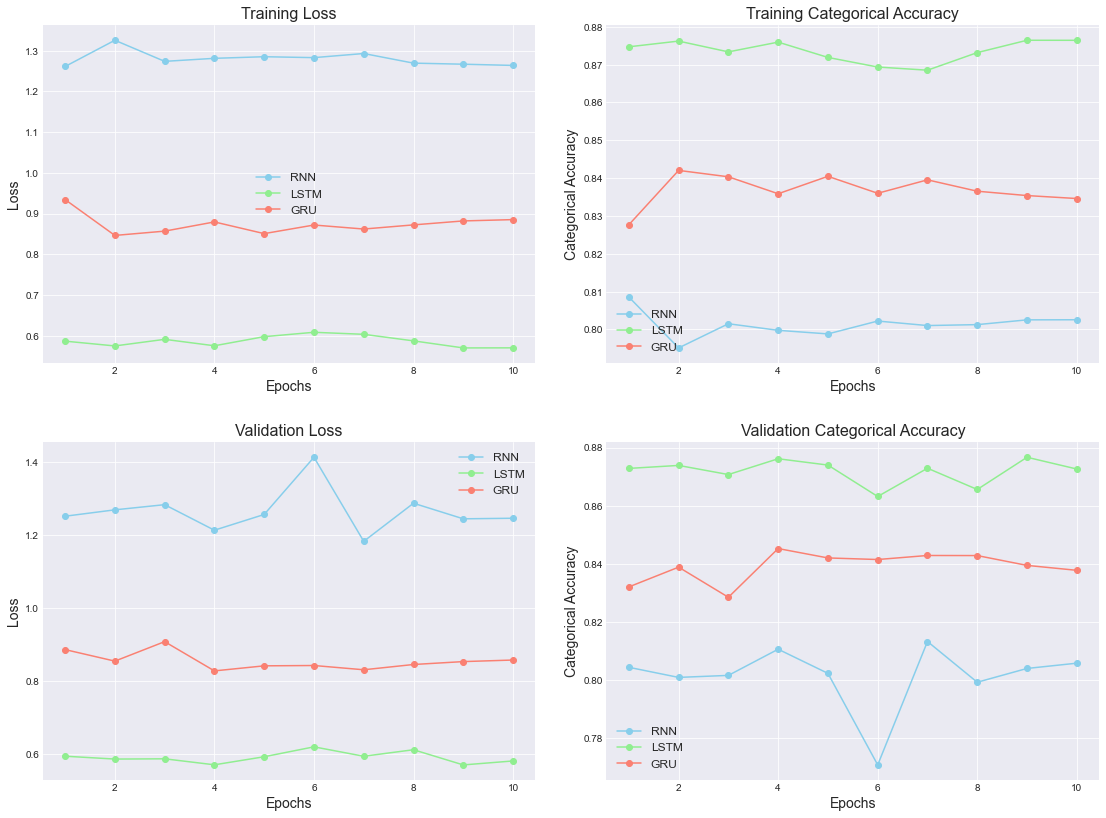

In [141]:
import matplotlib.pyplot as plt

def plot_model_histories(history_rnn, history_lstm, history_gru):
    epochs = range(1, len(history_rnn.history['loss']) + 1)

    plt.figure(figsize=(16, 12))
    plt.style.use('seaborn-darkgrid')  # Using seaborn style for better aesthetics

    # Color palette
    colors = ['skyblue', 'lightgreen', 'salmon']

    # Plotting training loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history_rnn.history['loss'], label='RNN', color=colors[0], marker='o')
    plt.plot(epochs, history_lstm.history['loss'], label='LSTM', color=colors[1], marker='o')
    plt.plot(epochs, history_gru.history['loss'], label='GRU', color=colors[2], marker='o')
    plt.title('Training Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)

    # Plotting training categorical accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history_rnn.history['categorical_accuracy'], label='RNN', color=colors[0], marker='o')
    plt.plot(epochs, history_lstm.history['categorical_accuracy'], label='LSTM', color=colors[1], marker='o')
    plt.plot(epochs, history_gru.history['categorical_accuracy'], label='GRU', color=colors[2], marker='o')
    plt.title('Training Categorical Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Categorical Accuracy', fontsize=14)
    plt.legend(fontsize=12)

    # Plotting validation loss
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history_rnn.history['val_loss'], label='RNN', color=colors[0], marker='o')
    plt.plot(epochs, history_lstm.history['val_loss'], label='LSTM', color=colors[1], marker='o')
    plt.plot(epochs, history_gru.history['val_loss'], label='GRU', color=colors[2], marker='o')
    plt.title('Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)

    # Plotting validation categorical accuracy
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history_rnn.history['val_categorical_accuracy'], label='RNN', color=colors[0], marker='o')
    plt.plot(epochs, history_lstm.history['val_categorical_accuracy'], label='LSTM', color=colors[1], marker='o')
    plt.plot(epochs, history_gru.history['val_categorical_accuracy'], label='GRU', color=colors[2], marker='o')
    plt.title('Validation Categorical Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Categorical Accuracy', fontsize=14)
    plt.legend(fontsize=12)

    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

# Assuming history_rnn, history_lstm, history_gru are actual History objects from Keras
plot_model_histories(history, history_lstm, history_gru)


In [142]:
# French reference sentence
french_sentence = "Je n' arrive pas à croire que vous ne soyez pas disposés à au moins envisager la possibilité qu' il y ait une autre explication."

# Ideal English translation
english_sentence = "I can't believe that you aren't at least willing to consider the possibility that there's another explanation."

# LSTM model prediction
lstm_prediction = "I can't believe that are are are least least willing least consider consider possibility possibility there another another explanation."

# GRU model prediction
gru_prediction = "I'm n't believe to to , , , , , , consider consider possibility possibility possibility to . . ."

# RNN model prediction
rnn_prediction = "I We 'm , , to to ."


In [143]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

def calculate_bleu(candidate, reference):
    # Tokenizing the candidate and reference sentences
    candidate_tokens = word_tokenize(candidate)
    reference_tokens = word_tokenize(reference)
    
    # The reference tokens need to be in a list of lists format
    references = [reference_tokens]
    
    # Calculating the BLEU score
    bleu_score = sentence_bleu(references, candidate_tokens)
    
    return bleu_score

# Calculate BLEU score for LSTM prediction
bleu_score_lstm = calculate_bleu(lstm_prediction, english_sentence)
bleu_score_gru = calculate_bleu(gru_prediction, english_sentence)
bleu_score_rnn = calculate_bleu(rnn_prediction, english_sentence)

print(f"BLEU Score for LSTM prediction: {bleu_score_lstm}")
print("BLEU Score for GRU prediction:", bleu_score_gru)
print("BLEU Score for RNN prediction:", bleu_score_rnn)


BLEU Score for LSTM prediction: 0.2718067054614708
BLEU Score for GRU prediction: 5.359624986283916e-155
BLEU Score for RNN prediction: 2.8072921250592275e-232


c:\Users\Farae\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Farae\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Farae\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [144]:
from rouge import Rouge

def calculate_rouge(candidate, reference):
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference, avg=True)  # avg=True to get the average of the scores
    return scores

# Calculate ROUGE scores for LSTM, GRU, and RNN predictions
rouge_score_lstm = calculate_rouge(lstm_prediction, english_sentence)
rouge_score_gru = calculate_rouge(gru_prediction, english_sentence)
rouge_score_rnn = calculate_rouge(rnn_prediction, english_sentence)

print("ROUGE Score for LSTM prediction:", rouge_score_lstm)
print("ROUGE Score for GRU prediction:", rouge_score_gru)
print("ROUGE Score for RNN prediction:", rouge_score_rnn)


ROUGE Score for LSTM prediction: {'rouge-1': {'r': 0.625, 'p': 0.8333333333333334, 'f': 0.7142857093877552}, 'rouge-2': {'r': 0.3125, 'p': 0.29411764705882354, 'f': 0.30303029803489445}, 'rouge-l': {'r': 0.625, 'p': 0.8333333333333334, 'f': 0.7142857093877552}}
ROUGE Score for GRU prediction: {'rouge-1': {'r': 0.25, 'p': 0.5, 'f': 0.33333332888888895}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.25, 'p': 0.5, 'f': 0.33333332888888895}}
ROUGE Score for RNN prediction: {'rouge-1': {'r': 0.125, 'p': 0.4, 'f': 0.1904761868480726}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.125, 'p': 0.4, 'f': 0.1904761868480726}}


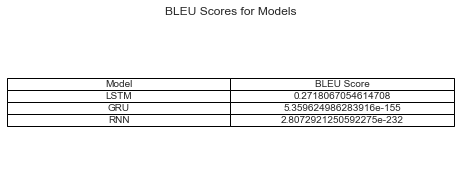

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# BLEU Scores Data
data_bleu = {
    'Model': ['LSTM', 'GRU', 'RNN'],
    'BLEU Score': [0.2718067054614708, 5.359624986283916e-155, 2.8072921250592275e-232]
}
df_bleu = pd.DataFrame(data_bleu)

# Plotting BLEU Scores Table
fig, ax = plt.subplots(figsize=(8, 3))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_bleu.values, colLabels=df_bleu.columns, cellLoc='center', loc='center')
plt.title('BLEU Scores for Models')
plt.savefig('bleu_scores_table.png')
plt.show()




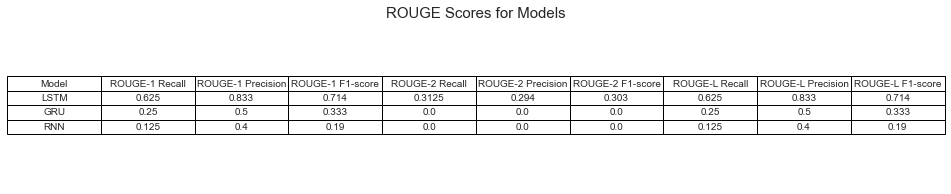

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# ROUGE Scores Data for LSTM, GRU, and RNN, split into separate columns for precision, recall, and F1-score
data_rouge = {
    'Model': ['LSTM', 'GRU', 'RNN'],
    'ROUGE-1 Recall': [0.625, 0.250, 0.125],
    'ROUGE-1 Precision': [0.833, 0.500, 0.400],
    'ROUGE-1 F1-score': [0.714, 0.333, 0.190],
    'ROUGE-2 Recall': [0.3125, 0.0, 0.0],
    'ROUGE-2 Precision': [0.294, 0.0, 0.0],
    'ROUGE-2 F1-score': [0.303, 0.0, 0.0],
    'ROUGE-L Recall': [0.625, 0.250, 0.125],
    'ROUGE-L Precision': [0.833, 0.500, 0.400],
    'ROUGE-L F1-score': [0.714, 0.333, 0.190]
}
df_rouge = pd.DataFrame(data_rouge)

# Plotting ROUGE Scores Table
fig, ax = plt.subplots(figsize=(14, 3))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df_rouge.values, colLabels=df_rouge.columns, cellLoc='center', loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)  # Adjust table scale for better spacing
plt.title('ROUGE Scores for Models', fontsize=15)
plt.savefig('rouge_scores_table_separated.png')
plt.show()

